In [73]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df=pd.read_excel('Adidas US Sales Datasets.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9652 entries, 0 to 9651
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   9649 non-null   object 
 2   Unnamed: 2   9650 non-null   object 
 3   Unnamed: 3   9649 non-null   object 
 4   Unnamed: 4   9649 non-null   object 
 5   Unnamed: 5   9649 non-null   object 
 6   Unnamed: 6   9649 non-null   object 
 7   Unnamed: 7   9649 non-null   object 
 8   Unnamed: 8   9649 non-null   object 
 9   Unnamed: 9   9649 non-null   object 
 10  Unnamed: 10  9649 non-null   object 
 11  Unnamed: 11  9649 non-null   object 
 12  Unnamed: 12  9649 non-null   object 
 13  Unnamed: 13  9649 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.0+ MB


In [4]:
df = df.drop('Unnamed: 0',axis=1)
df = df.drop(labels=[0,1,2], axis=0)
df.columns = df.iloc[0]
df = df.drop(labels=3, axis=0)
df = df.reset_index(drop=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [6]:
# Assuming df is your DataFrame
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['Price per Unit'] = pd.to_numeric(df['Price per Unit'], errors='coerce').astype('int64')
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce').astype('int64')
df['Total Sales'] = pd.to_numeric(df['Total Sales'], errors='coerce').astype('int64')
df['Operating Margin'] = pd.to_numeric(df['Operating Margin'], errors='coerce').astype('int64')
df['Operating Profit'] = pd.to_numeric(df['Operating Profit'], errors='coerce').astype('int64')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   int64         
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   int64         
 10  Operating Profit  9648 non-null   int64         
 11  Operating Margin  9648 non-null   int64         
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 980.0+ KB


In [7]:
df['Product'].value_counts()

Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: count, dtype: int64

In [8]:
df.describe()

3,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.0
mean,2021-05-10 15:20:44.776119296,45.182214,256.930037,93273.403089,34424.911692,0.0
min,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.0
25%,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.000000,0.0
50%,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.000000,0.0
75%,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.000000,0.0
max,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.0
std,NaN,14.698080,214.252030,141915.997157,54193.216234,0.0


In [9]:
df.describe(include='object')

3,Retailer,Retailer ID,Region,State,City,Product,Sales Method
count,9648,9648,9648,9648,9648,9648,9648
unique,6,4,5,50,52,6,3
top,Foot Locker,1185732,West,California,Portland,Men's Street Footwear,Online
freq,2637,5265,2448,432,360,1610,4889


### **Attributes Information**

| **Attribute** | **Data Type** | **Limitation** |
| --- | --- | --- |
| Retailer | Object | 1. Foot Locker 2. West Gear 3. Sport Direct 4. Kohl's 5. Amazon 6. Walmart  |
| Region | Object | 1. West 2. Northeast 3. South 4. South 5. Midwest 6. Southeast |
| Product | Object | 1. Women's Athletic Footwear 2. Men's Apparel  3. Women's Street Footwear 4.Men's Athletic Footwear 5. Men's Street Footwear 6. Women's Apparel  |
| Price per Unit | int64 | values between 9 - 75 |
| Units Sold | int64 | value between 6 - 318 |
| Total Sales | int64 | value between 160 - 17447 |
| Operating Profit | int64 | value beetween 75 - 8085 |
| Sales Method | 1. Online 2. Outlet 3. In-store |
| Day | Object | 1. Monday 2. Tuesday 3. Wednesday 4. Thursday 5 Friday 6. Saturday 7. Sunday |
| Month | Object |value between 1-12 |
| Year | Object | 1. 2020 2. 2021|

<br>

In [10]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0,In-store


**Exploratory data analysis**

In [11]:
# Checking Unique Value
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
unique_values

,Column Name,Number of Unique,Unique Sample
0,Retailer,6,"[Foot Locker, Walmart, Sports Direct, West Gea..."
1,Retailer ID,4,"[1185732, 1197831, 1128299, 1189833]"
2,Invoice Date,724,"[2020-01-01 00:00:00, 2020-01-02 00:00:00, 202..."
3,Region,5,"[Northeast, South, West, Midwest, Southeast]"
4,State,50,"[New York, Texas, California, Illinois, Pennsy..."
5,City,52,"[New York, Houston, San Francisco, Los Angeles..."
6,Product,6,"[Men's Street Footwear, Men's Athletic Footwea..."
7,Price per Unit,94,"[50, 40, 45, 60, 55, 65, 70, 25, 35, 30, 80, 7..."
8,Units Sold,361,"[1200, 1000, 850, 900, 1250, 950, 825, 1220, 9..."
9,Total Sales,3243,"[600000, 500000, 400000, 382500, 540000, 62500..."


**Data Prepocessing**

In [12]:
# Mengubah tipe data Invoice Date

df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Melihat hari dari kolom Invoice Date
df['Day'] = df['Invoice Date'].dt.day_name()
df['Month'] = df['Invoice Date'].dt.month
df['Year'] = df['Invoice Date'].dt.year


In [13]:
df.drop(columns=['Retailer ID','Operating Margin', 'Invoice Date'],inplace=True, axis=1)

**Drop Columns**

In [14]:
numerical_features = df[['Price per Unit', 'Units Sold', 'Total Sales']]

<Axes: title={'center': 'Distribution of Total Sales'}, ylabel='Frequency'>

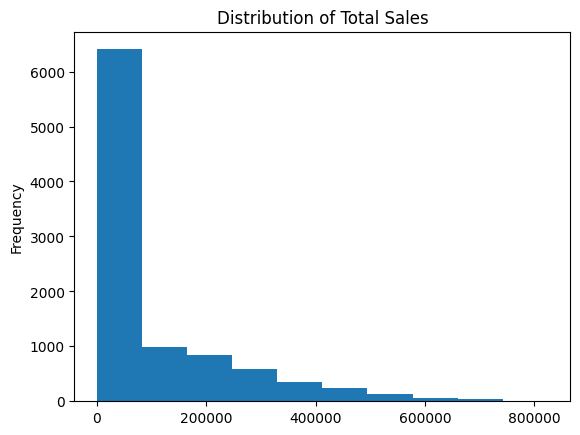

In [15]:
df['Total Sales'].plot(kind='hist', title= 'Distribution of Total Sales')

In [16]:
df.columns

Index(['Retailer', 'Region', 'State', 'City', 'Product', 'Price per Unit',
       'Units Sold', 'Total Sales', 'Operating Profit', 'Sales Method', 'Day',
       'Month', 'Year'],
      dtype='object', name=3)

In [17]:
from scipy.stats import normaltest

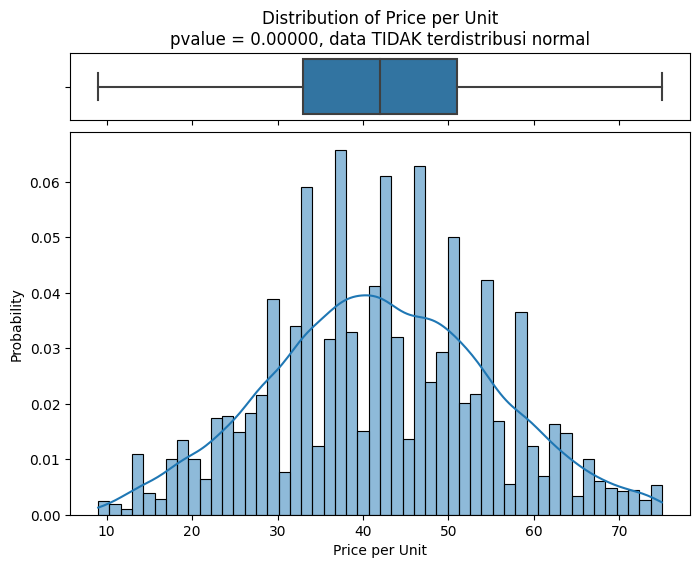

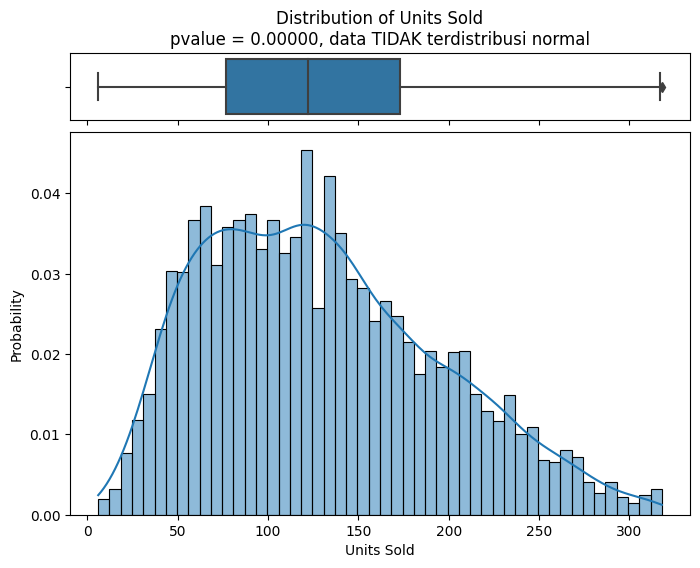

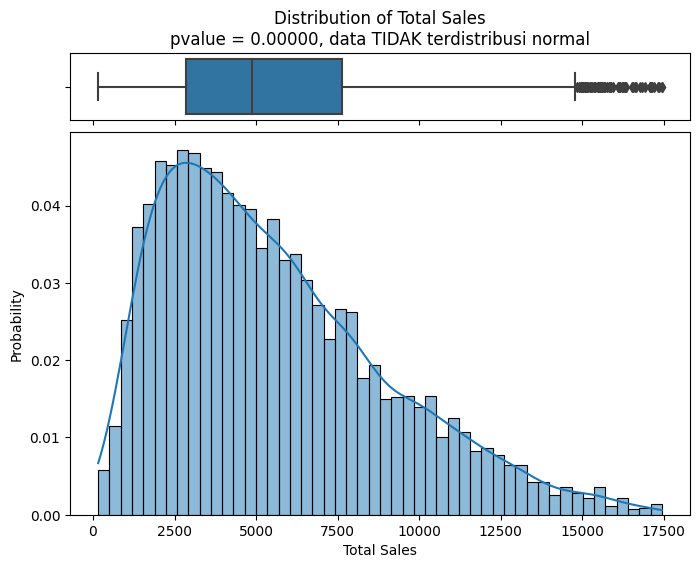

In [74]:
for kolom in numerical_features:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (8,6), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, stat = "probability", kde=True, bins=50)

    plt.show()

In [19]:
m_col=['Retailer', 'Region', 'Product', 'Price per Unit', 'Units Sold',
       'Total Sales', 'Sales Method', 'Day', 'Month',
       'Year']

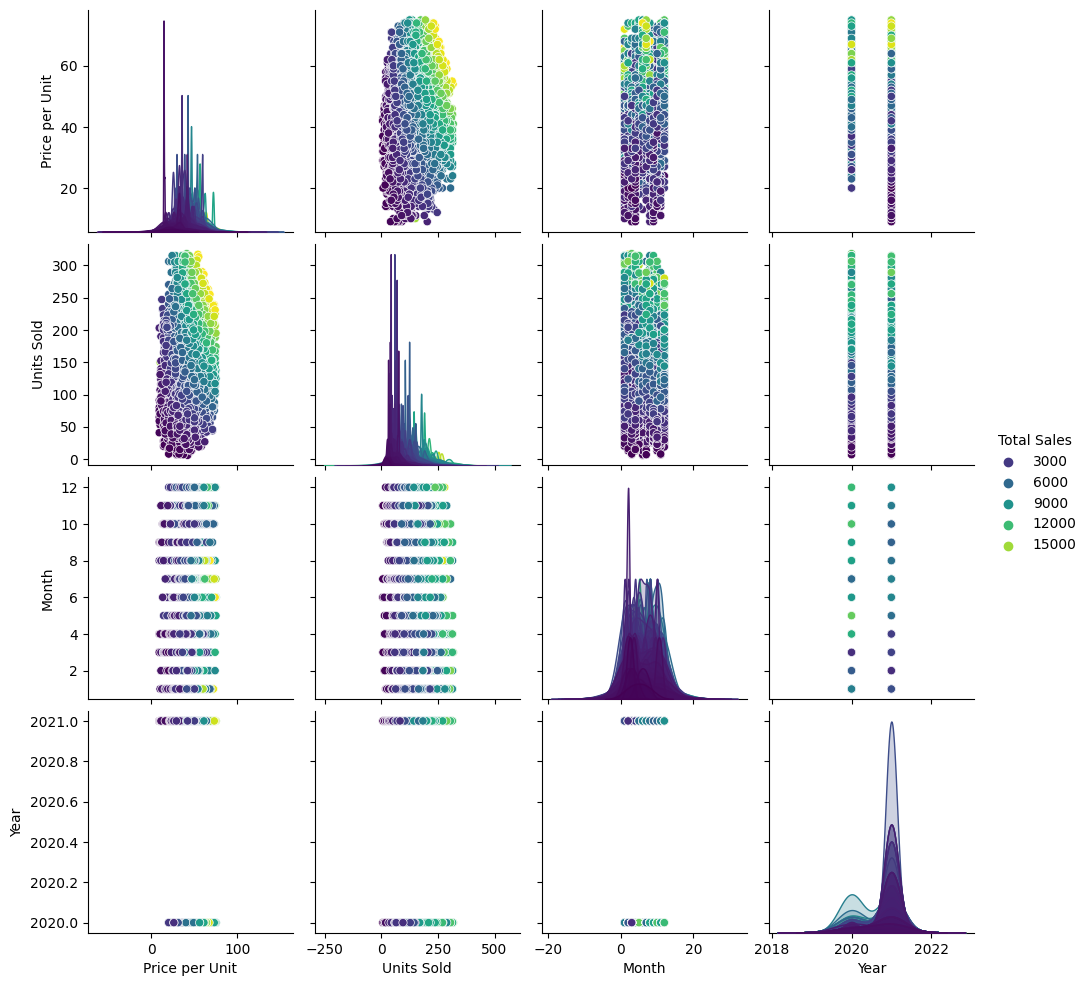

In [75]:
# Pairplot for mean columns
sns.pairplot(df[m_col],hue='Total Sales',palette='viridis')
plt.show()

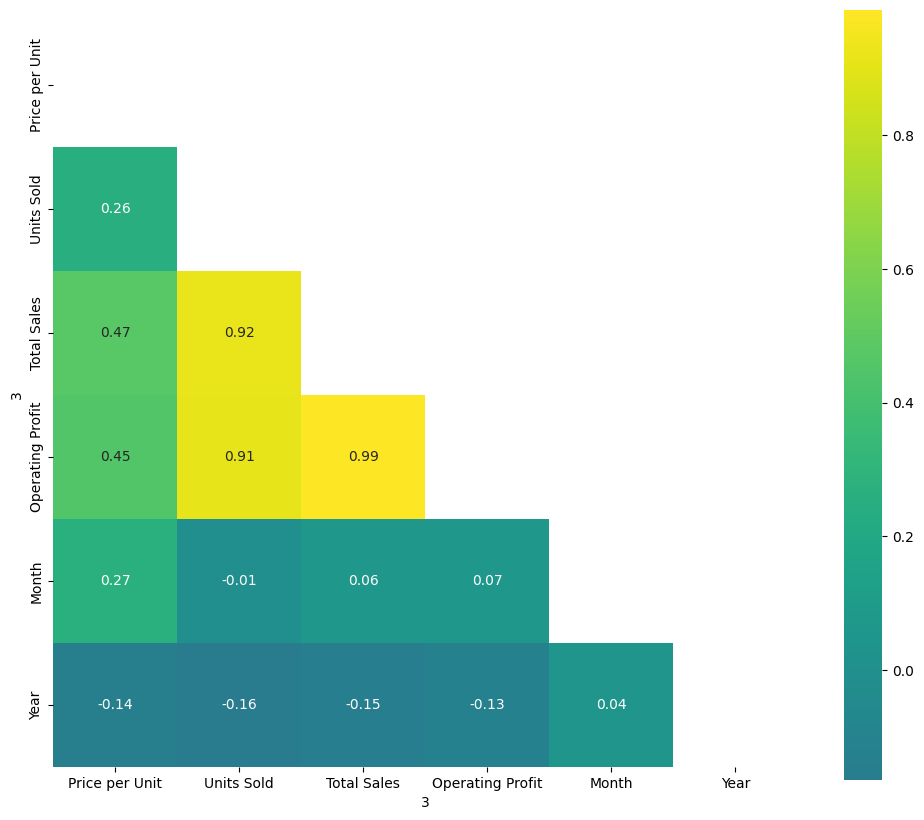

In [23]:
plt.figure(figsize=(12,10))

matrix = np.triu(df.corr(method='spearman',numeric_only=True))

sns.heatmap(data=df.corr(method='spearman',numeric_only=True), annot=True, fmt='.2f', cmap='viridis', center=0, mask = matrix, square='True')
plt.show()

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calc_vif(numerical):
    vif = pd.DataFrame()
    vif["variables"] = numerical.columns
    vif["VIF"] = [variance_inflation_factor(numerical.values, i) for i in range(numerical.shape[1])]
    return(vif)

In [25]:
calc_vif(numerical_features)

,variables,VIF
0,Price per Unit,2.846734
1,Units Sold,9.961496
2,Total Sales,6.458069


In [26]:
df = df.drop(columns=['Operating Profit','State','City'])

In [27]:
df

3,Retailer,Region,Product,Price per Unit,Units Sold,Total Sales,Sales Method,Day,Month,Year
0,Foot Locker,Northeast,Men's Street Footwear,50,1200,600000,In-store,Wednesday,1,2020
1,Foot Locker,Northeast,Men's Athletic Footwear,50,1000,500000,In-store,Thursday,1,2020
2,Foot Locker,Northeast,Women's Street Footwear,40,1000,400000,In-store,Friday,1,2020
3,Foot Locker,Northeast,Women's Athletic Footwear,45,850,382500,In-store,Saturday,1,2020
4,Foot Locker,Northeast,Men's Apparel,60,900,540000,In-store,Sunday,1,2020
...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,Northeast,Men's Apparel,50,64,3200,Outlet,Sunday,1,2021
9644,Foot Locker,Northeast,Women's Apparel,41,105,4305,Outlet,Sunday,1,2021
9645,Foot Locker,Northeast,Men's Street Footwear,41,184,7544,Outlet,Monday,2,2021
9646,Foot Locker,Northeast,Men's Athletic Footwear,42,70,2940,Outlet,Monday,2,2021


**Handling Outliers**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Retailer        9648 non-null   object
 1   Region          9648 non-null   object
 2   Product         9648 non-null   object
 3   Price per Unit  9648 non-null   int64 
 4   Units Sold      9648 non-null   int64 
 5   Total Sales     9648 non-null   int64 
 6   Sales Method    9648 non-null   object
 7   Day             9648 non-null   object
 8   Month           9648 non-null   int32 
 9   Year            9648 non-null   int32 
dtypes: int32(2), int64(3), object(5)
memory usage: 678.5+ KB


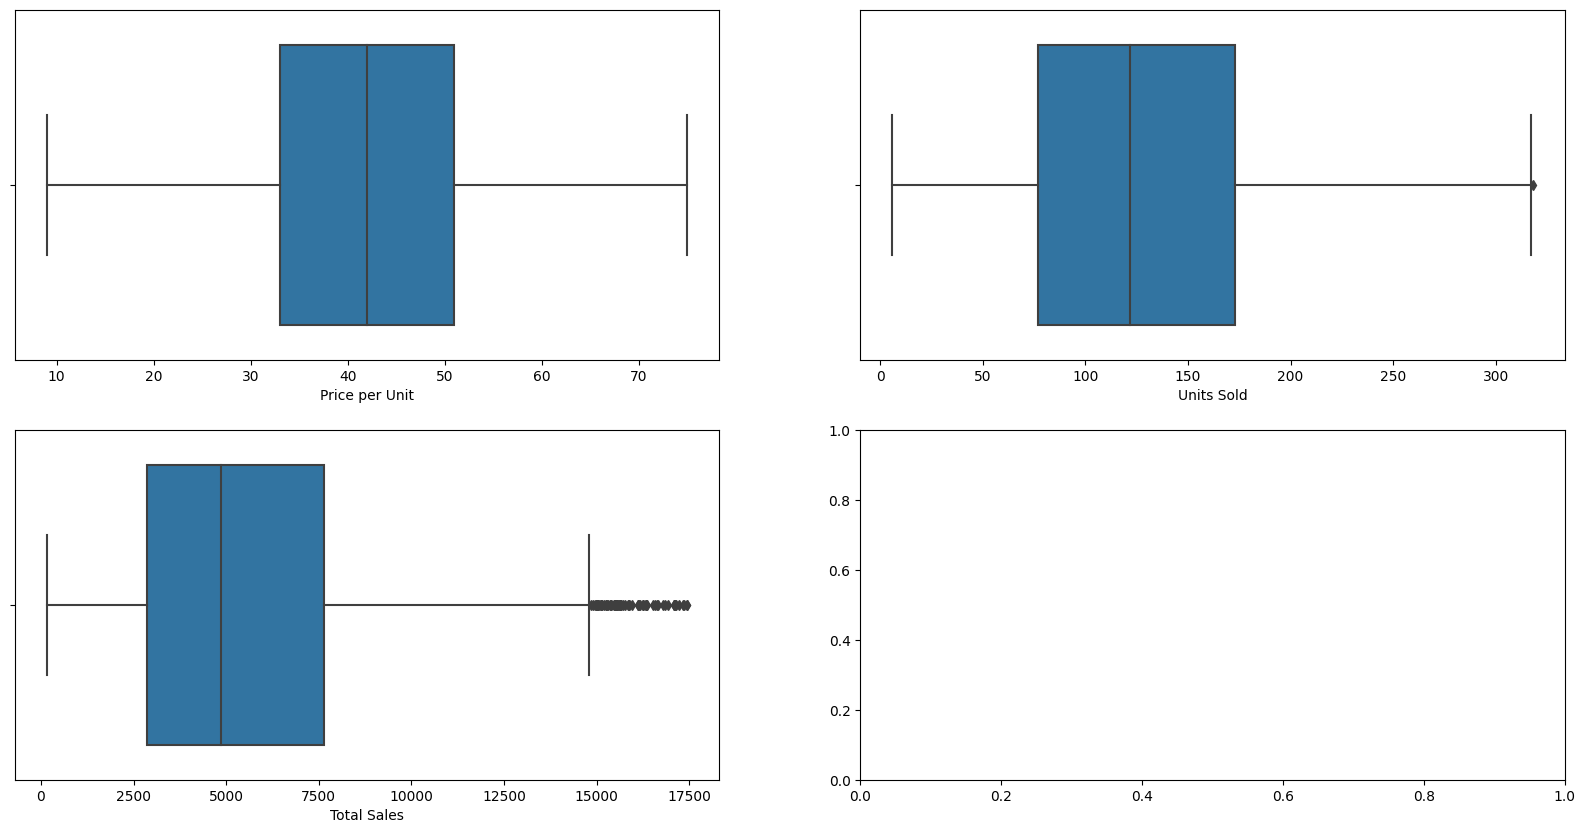

In [76]:
# Plot boxplot untuk mengecek outliers
fig, axes = plt.subplots(2,2, figsize=(20,10))
sns.boxplot(data=df, x=df['Price per Unit'], ax=axes[0][0])
sns.boxplot(data=df, x=df['Units Sold'], ax=axes[0][1])
sns.boxplot(data=df, x= df['Total Sales'], ax=axes[1][0])
plt.show()

In [33]:
df.describe(include='object')

3,Retailer,Region,Product,Sales Method,Day
count,9648,9648,9648,9648,9648
unique,6,5,6,3,7
top,Foot Locker,West,Men's Street Footwear,Online,Tuesday
freq,2637,2448,1610,4889,1490


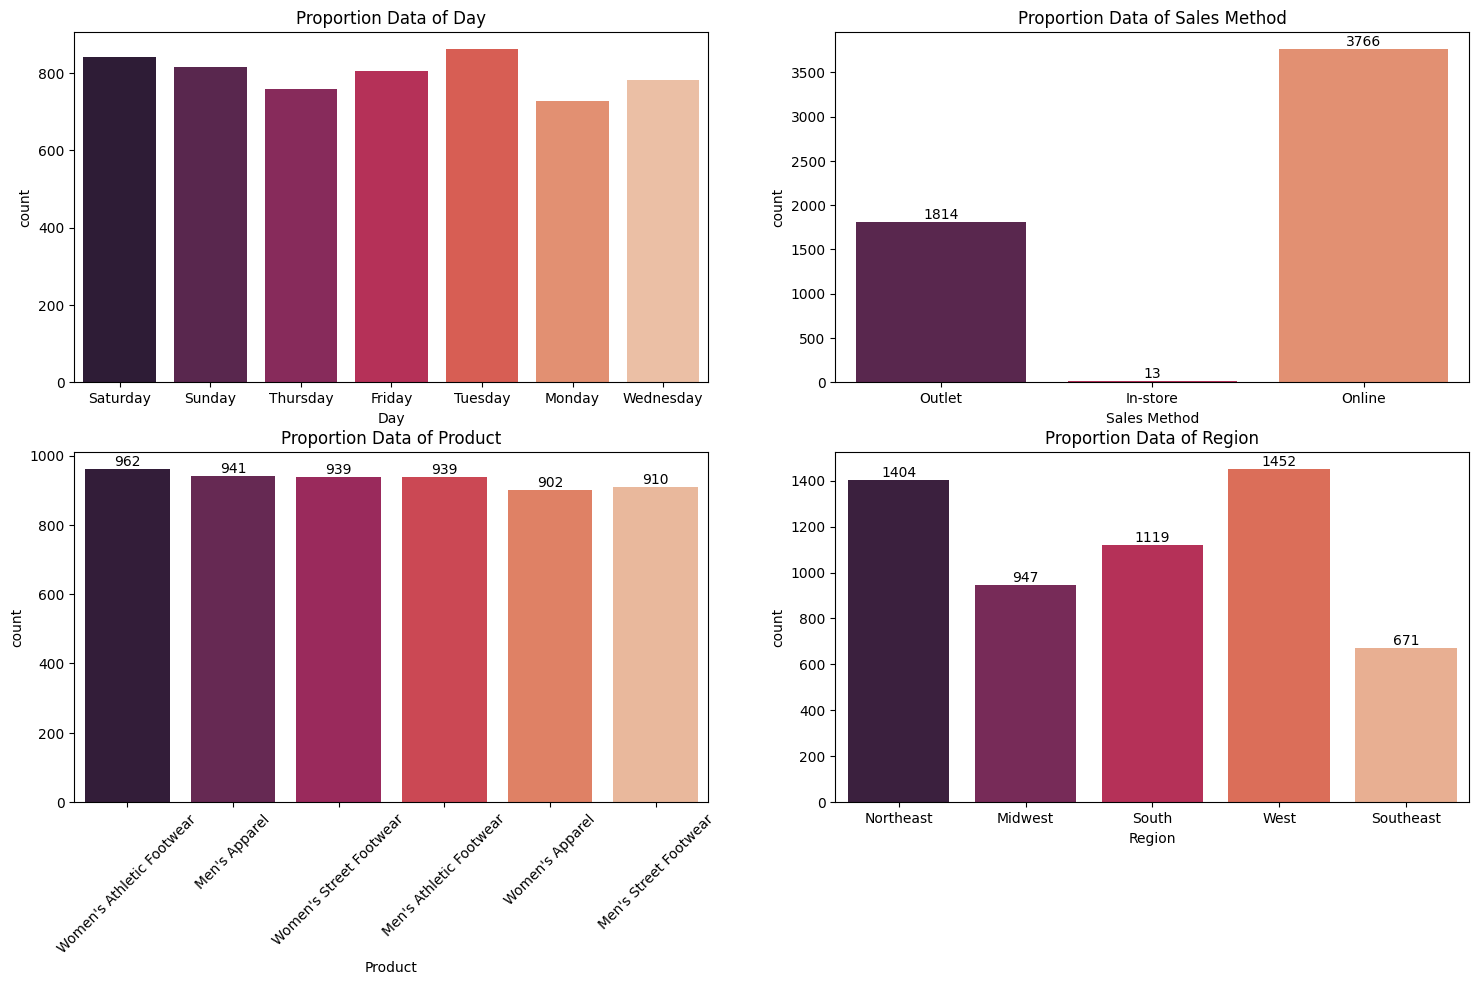

In [78]:
plt.figure(figsize = (18,10))
plt.subplot(2,2,4)
ax = sns.countplot(data=df, x='Region', palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Proportion Data of Region', size = 12)

plt.subplot(2, 2, 3)
ax = sns.countplot(data=df, x='Product', palette='rocket')
ax.bar_label(ax.containers[0])  # If you're using a version of Seaborn that supports this
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Corrected the method name for setting x-axis labels
plt.title('Proportion Data of Product', size=12)

plt.subplot(2,2,2)
ax = sns.countplot(data= df,x='Sales Method', palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Proportion Data of Sales Method', size = 12)

plt.subplot(2,2,1)
sns.countplot(data=df, x='Day', palette='rocket')
plt.title('Proportion Data of Day', size = 12)

plt.show()

In [35]:
numerical_features = df[['Price per Unit','Units Sold','Total Sales']].describe().columns

In [36]:
# mencari nilai lower dan upper fence pada masing-masing kolom numerikal

list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature]<lower_fence]))
    number_inside.append(len(df[(df[feature]>=lower_fence) & (df[feature]<=upper_fence)]))
    number_upper.append(len(df[df[feature]>upper_fence]))
    percentage_outlier.append(round((len(df[df[feature]<lower_fence]) + len(df[df[feature]>upper_fence])) / len(df)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,Price per Unit,5.00,85.00,0,9567,81,0.84
1,Units Sold,-260.00,716.00,0,9140,508,5.27
2,Total Sales,-214363.75,368618.25,0,8995,653,6.77


In [37]:
df = df[(df['Price per Unit'] > 8) & (df['Price per Unit'] <= 75)]
df = df[(df['Units Sold'] <= 318)]
df = df[(df['Total Sales'] <= 17481)]

In [38]:
df = df.drop(df[df["Total Sales"] == 0].index)

In [40]:
# mencari nilai lower dan upper fence pada masing-masing kolom numerikal

list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature]<lower_fence]))
    number_inside.append(len(df[(df[feature]>=lower_fence) & (df[feature]<=upper_fence)]))
    number_upper.append(len(df[df[feature]>upper_fence]))
    percentage_outlier.append(round((len(df[df[feature]<lower_fence]) + len(df[df[feature]>upper_fence])) / len(df)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,Price per Unit,6.0,78.0,0,5593,0,0.00
1,Units Sold,-67.0,317.0,0,5592,1,0.02
2,Total Sales,-4305.0,14807.0,0,5512,81,1.45


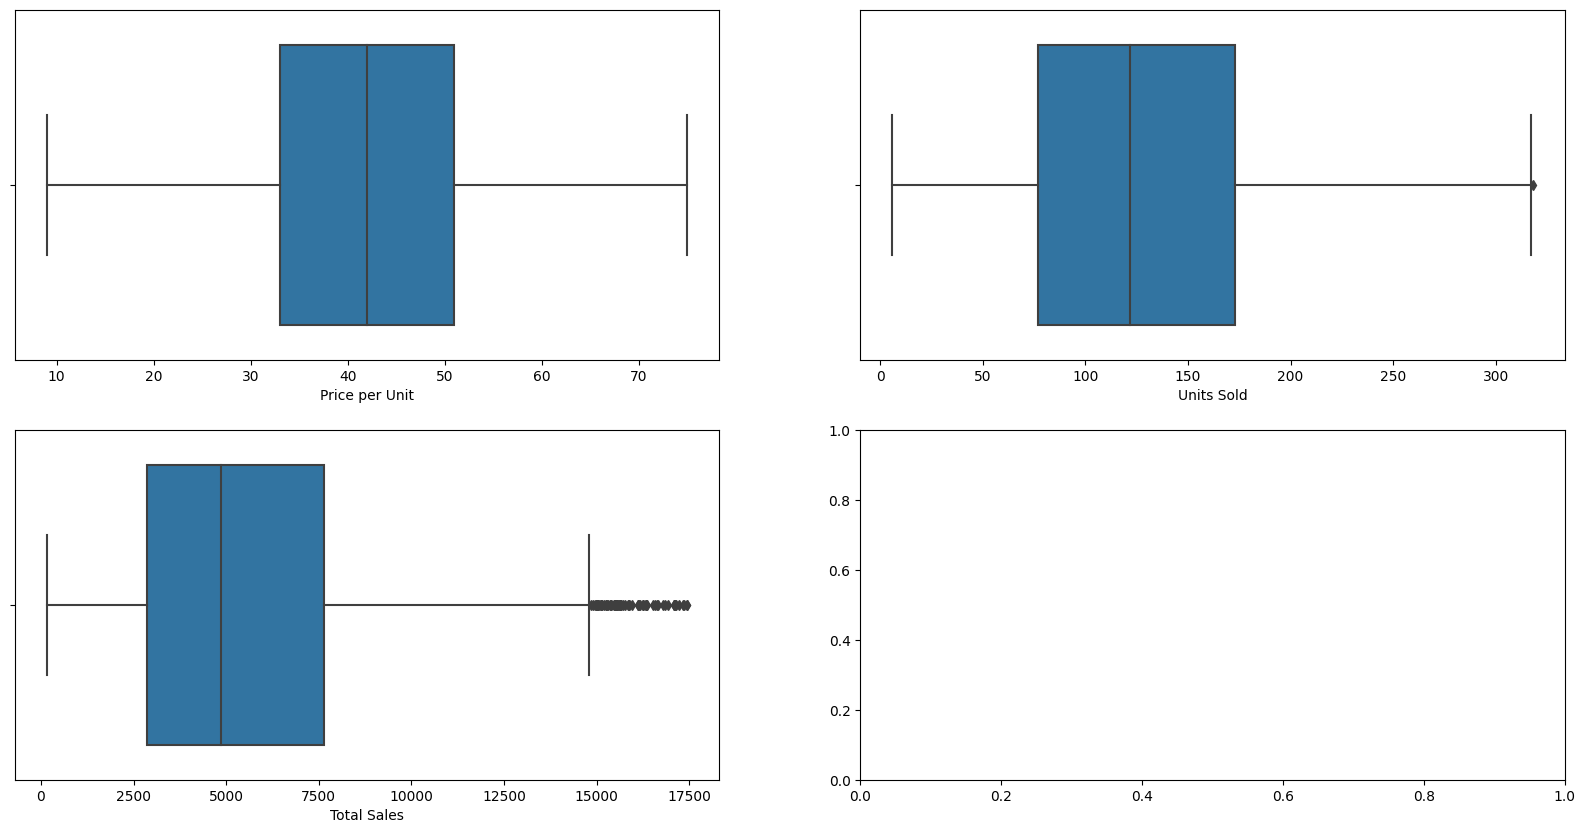

In [79]:
# Plot boxplot untuk mengecek outliers
fig, axes = plt.subplots(2,2, figsize=(20,10))
sns.boxplot(data=df, x=df['Price per Unit'], ax=axes[0][0])
sns.boxplot(data=df, x=df['Units Sold'], ax=axes[0][1])
sns.boxplot(data=df, x= df['Total Sales'], ax=axes[1][0])
plt.show()

# Data Analysis:

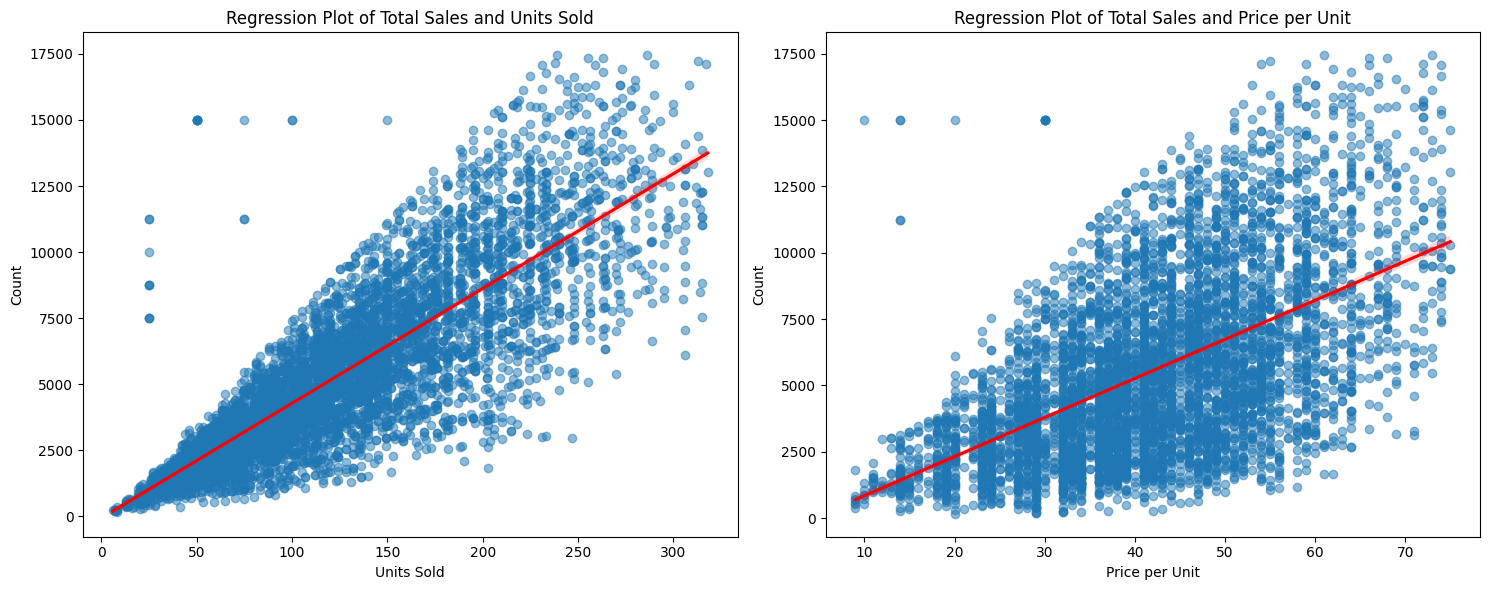

In [42]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.regplot(data=df, y='Total Sales', x='Units Sold', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Regression Plot of Total Sales and Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.regplot(data=df, y='Total Sales', x='Price per Unit', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Regression Plot of Total Sales and Price per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
df.describe()

3,Price per Unit,Units Sold,Total Sales,Month,Year
count,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000
mean,42.023243,129.409798,5560.065618,6.443948,2020.875380
std,12.935690,64.766463,3422.772281,3.477669,0.330317
min,9.000000,6.000000,160.000000,1.000000,2020.000000
25%,33.000000,77.000000,2862.000000,3.000000,2021.000000
50%,42.000000,122.000000,4872.000000,6.000000,2021.000000
75%,51.000000,173.000000,7640.000000,9.000000,2021.000000
max,75.000000,318.000000,17447.000000,12.000000,2021.000000


In [43]:
top_products= df[['Product','Total Sales']].groupby('Product').sum().reset_index().sort_values('Total Sales', ascending=False)
top_reteiler = df[['Retailer', 'Total Sales']].groupby('Retailer').sum().reset_index().sort_values('Total Sales', ascending=False)
top_region = df[['Region', 'Total Sales']].groupby('Region').sum().reset_index().sort_values('Total Sales', ascending=False)
top_method = df[['Sales Method', 'Total Sales']].groupby('Sales Method').sum().reset_index().sort_values('Total Sales', ascending=False)


In [44]:
df.shape

(5593, 10)

In [45]:
df.describe(include='object')

3,Retailer,Region,Product,Sales Method,Day
count,5593,5593,5593,5593,5593
unique,6,5,6,3,7
top,Foot Locker,West,Women's Athletic Footwear,Online,Tuesday
freq,1488,1452,962,3766,863


In [46]:
top_products

3,Product,Total Sales
2,Men's Street Footwear,6687081
3,Women's Apparel,5780222
1,Men's Athletic Footwear,5448003
5,Women's Street Footwear,4654999
0,Men's Apparel,4406555
4,Women's Athletic Footwear,4120587


In [ ]:
top_reteiler

3,Retailer,Total Sales
5,West Gear,8093818
1,Foot Locker,7160386
3,Sports Direct,6941324
2,Kohl's,3667753
4,Walmart,2658992
0,Amazon,2575174


In [ ]:
top_region

3,Region,Total Sales
4,West,9716382
1,Northeast,6576125
2,South,6372555
3,Southeast,4837168
0,Midwest,3595217


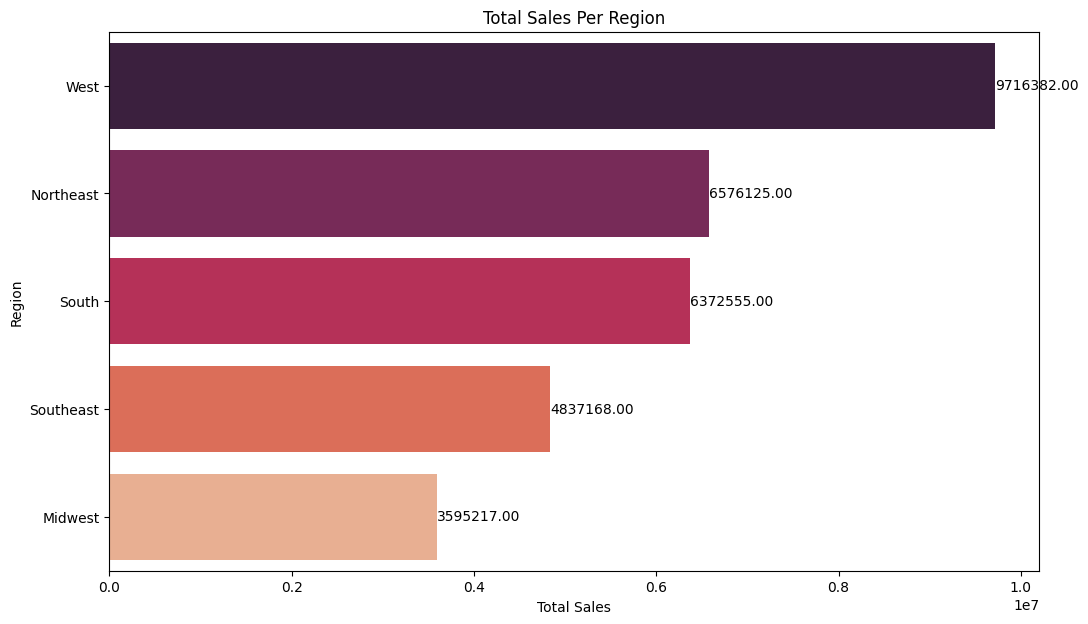

In [80]:
plt.figure(figsize=(12,7))
ax = sns.barplot(data=top_region, x='Total Sales', y='Region', palette='rocket', ci=None)

# Menambahkan teks di setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

plt.title('Total Sales Per Region')
plt.show()

**Men's Street Footwear has the highest sales amount**

In [48]:
top_retailers= df[['Retailer','Total Sales']].groupby('Retailer').sum()

**Men's Street Footwear has the highest sales amount**


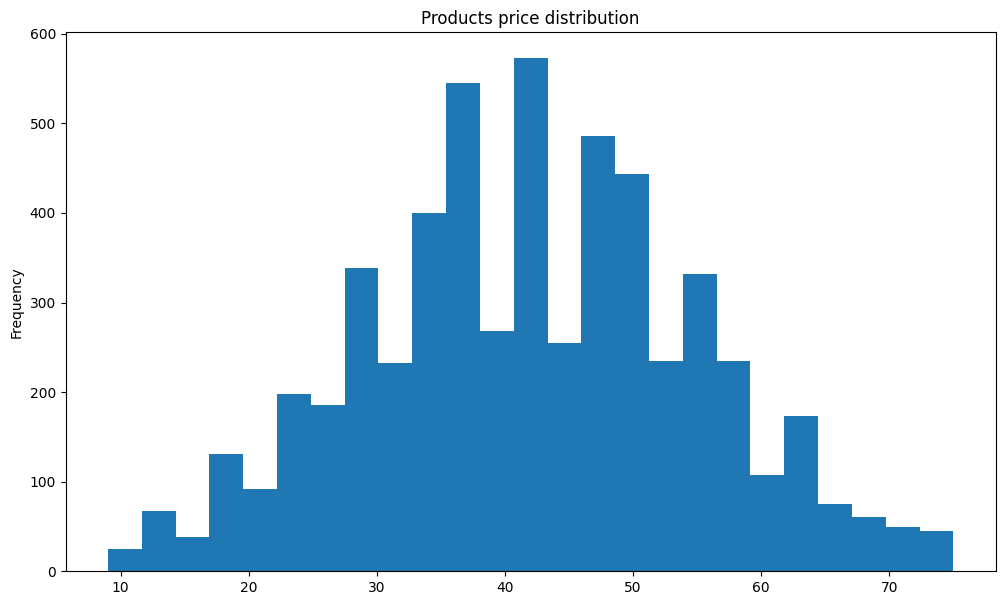

In [81]:
df['Price per Unit'].plot(kind='hist',bins=25,figsize=(12,7),title='Products price distribution')
plt.show()

In [ ]:
df['Price per Unit'].mean()

42.02324333988915

In [ ]:
top_salesmt= df[['Sales Method','Total Sales']].groupby('Sales Method').median().round(0)

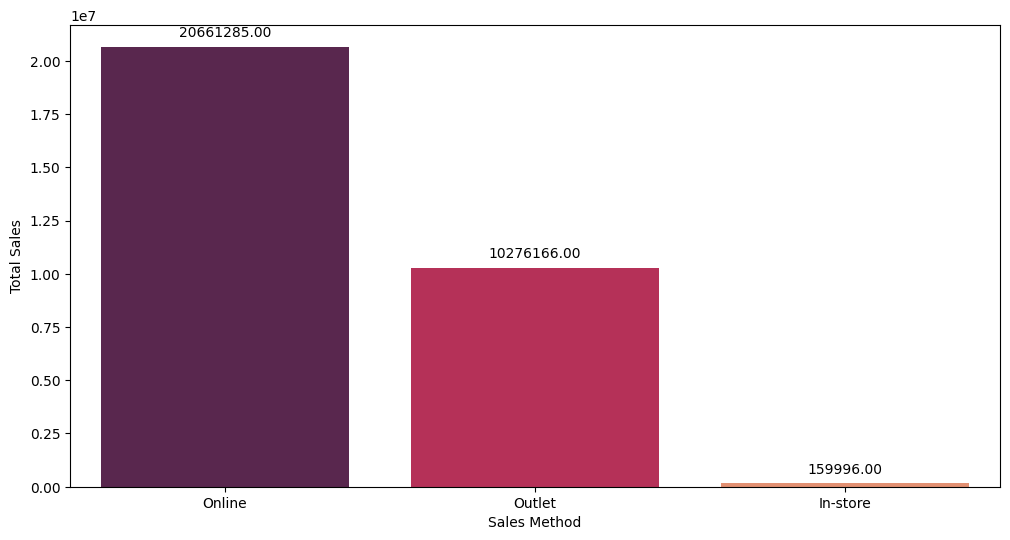

In [82]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=top_method, x= 'Sales Method', y='Total Sales',ci=0, palette='rocket')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

**It's clear that retailers sell more products in-store**

## **Modeling**

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [51]:
df = df.astype({
    "Month": "object",
    "Year" : "object"
})

**Encoding**

In [53]:
categorical_features = df.describe(include='object').columns

In [54]:
# menampilkan jumlah unik dan unique values untuk setiap kolom
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in categorical_features :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,Retailer,6,"[Amazon, Foot Locker, Kohl's, Sports Direct, Walmart, West Gear]"
1,Region,5,"[Midwest, Northeast, South, Southeast, West]"
2,Product,6,"[Men's Apparel, Men's Athletic Footwear, Men's Street Footwear, Women's Apparel, Women's Athletic Footwear, Women's Street Footwear]"
3,Sales Method,3,"[In-store, Online, Outlet]"
4,Day,7,"[Friday, Monday, Saturday, Sunday, Thursday, Tuesday, Wednesday]"
5,Month,12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
6,Year,2,"[2020, 2021]"


In [55]:
# Mendefinisikan urutan ordinal untuk encoder ordinal
ordinal_mapping = {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Retailer', 'Region', 'Product', 'Sales Method', 'Year']),
    ('Ordinal', OrdinalEncoder(categories=[list(ordinal_mapping.keys())]), ['Day'])
], remainder='passthrough')

**Define Features and Target**

In [57]:
# Define Features (X)
X = df.drop(columns=['Total Sales'],axis=1)

# Define Label (y)
y = df['Total Sales']

**Data Spliting**

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

<Axes: xlabel='Total Sales'>

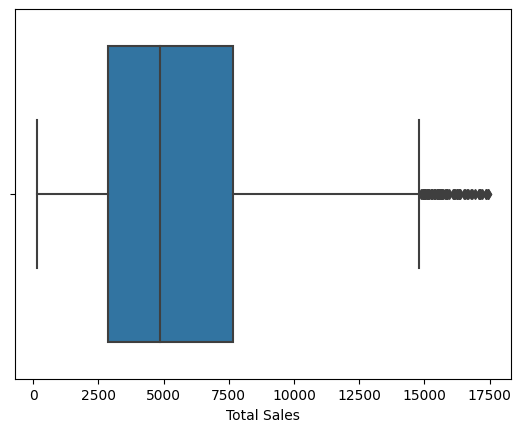

In [59]:
sns.boxplot(data=df, x= 'Total Sales')

**Model Benchmarking**

In [60]:
# Menentukan algoritma yang akan digunakan
linreg = LinearRegression()
knn = KNeighborsRegressor()
dtree = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
gb = GradientBoostingRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

In [61]:
# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_linreg = TransformedTargetRegressor(linreg, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dtree = TransformedTargetRegressor(dtree, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

#define scaler
scaler = MinMaxScaler()

# Kandidat algoritma
models = [log_linreg, log_knn, log_dtree, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-1448.70792185 -1248.94636071 -1469.85183658 -1285.60937932
 -1321.39570221] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-787.90707962 -770.0510047  -818.4121781  -772.47010066 -792.64515416] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.17119956 -0.15573099 -0.16069618 -0.17280177 -0.14748896] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-2166.12366863 -2234.46685518 -2439.12528366 -2262.7090605
 -2328.06503073] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-1546.07936003 -1645.12689423 -1653.31956977 -1617.10872962
 -1713.15254489] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           

In [62]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'RMSE': nilai_mean_rmse,
    'MAE': nilai_mean_mae,
    'MAPE': nilai_mean_mape,
}).sort_values('RMSE',ascending=False)

,Model,RMSE,MAE,MAPE
4,XGBoost Regressor,-483.534907,-127.735991,-0.032153
3,RandomForest Regressor,-567.096361,-107.481904,-0.025022
2,DecisionTree Regressor,-716.593531,-193.688123,-0.049331
0,Linear Regression,-1354.902240,-788.297103,-0.161583
1,KNN Regressor,-2286.097980,-1634.957420,-0.383940


In [63]:
xgb = TransformedTargetRegressor(XGBRegressor(random_state=12), func=np.log, inverse_func=np.exp)

score_mae = []
score_mape = []
score_rmse = []

estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
score_mae.append(mean_absolute_error(y_test, y_pred))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=['XGB'])
score_before_tuning

,RMSE,MAE,MAPE
XGB,445.091089,108.001835,0.023628


In [64]:
# Kedalaman pohon
max_depth = [2,3,4,5,6,7,8,9,10,11]

# Learning rate
learning_rate = [0.1, 0.001, 0.0001, 0.2, 0.3, 0.5, 0,7]

# Jumlah pohon
n_estimators = list(np.arange(200, 301, 20))

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
}

# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('transformer', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=12)

# Hyperparameter tuning
randomsearch_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    cv = crossval, 
    scoring = 'neg_mean_absolute_error', 
    n_jobs = -1,
    n_iter=1000
)

In [65]:
# Fitting data training untuk mencari parameter terbaik
randomsearch_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Retailer',
                                                                                'Region',
                                                                                'Product',
                                                                                'Sales '
                                                                                'Method',
                                                                                'Year']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(categories=[['Monday',
                                                                                                           'Tuesday',
                                                                                                           'Wednesday',
                                                                                                           'Thursday',
                                                                                                           'Friday...
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=0, ...))]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.1, 0.001,
                                                                 0.0001, 0.2,
                                                                 0.3, 0.5, 0,
                                                                 7],
                                        'model__max_depth': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11],
                                        'model__n_estimators': [200, 220, 240,
                                                                260, 280,
                                                                300]},
                   scoring='neg_mean_absolute_error')

In [66]:
print('XGBoost')
print('Best_score:', randomsearch_xgb.best_score_)
print('Best_params:', randomsearch_xgb.best_params_)

XGBoost
Best_score: -110.43578256580258
Best_params: {'model__n_estimators': 300, 'model__max_depth': 10, 'model__learning_rate': 0.1}


**Predict to test set**

In [67]:
# Model XGBoost
model = {'XGB': TransformedTargetRegressor(randomsearch_xgb.best_estimator_,func=np.log, inverse_func=np.exp)}

# Define model terhadap estimator terbaik
xgb_tuning = TransformedTargetRegressor(randomsearch_xgb.best_estimator_, func=np.log, inverse_func=np.exp)

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,464.690889,74.965899,0.015084


In [68]:

display(score_before_tuning,score_after_tuning)

,RMSE,MAE,MAPE
XGB,445.091089,108.001835,0.023628


,RMSE,MAE,MAPE
XGB,464.690889,74.965899,0.015084


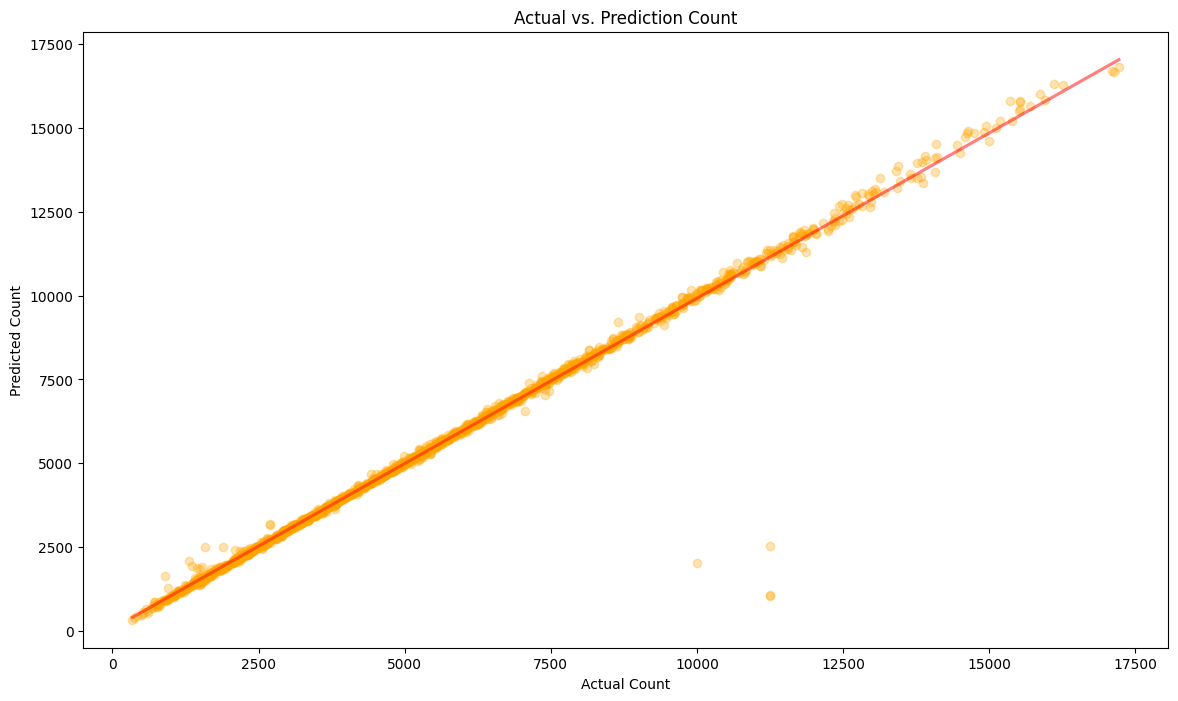

In [69]:
plt.figure(figsize=(14, 8))
sns.regplot(x=y_test, y=y_pred_xgb_tuning, ci=None, scatter_kws = {'color': 'orange', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha': 0.5}).set(title='Actual vs. Prediction Count', 
                                               xlabel='Actual Count', 
                                               ylabel='Predicted Count')
plt.show()

Text(0, 0.5, 'Features')

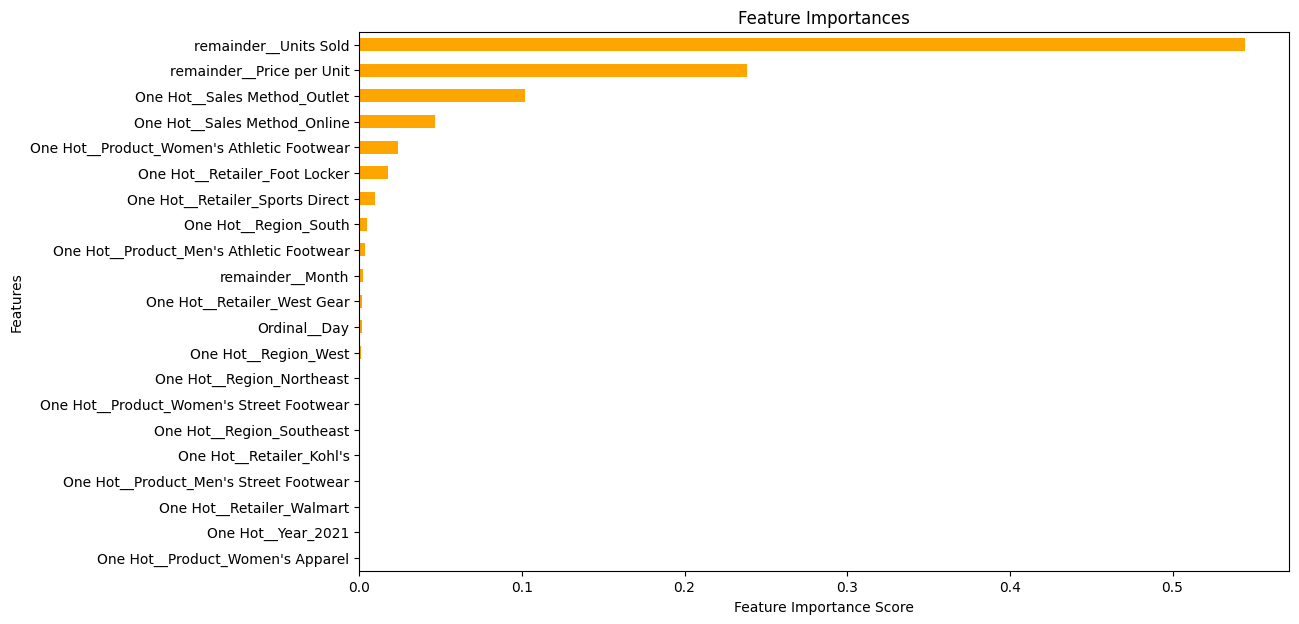

In [70]:
# Plot feature importances
xgb_tuning = randomsearch_xgb.best_estimator_

feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values()
plt.figure(figsize=(12, 7))
feature_imp.plot(kind='barh', title='Feature Importances', color='orange')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

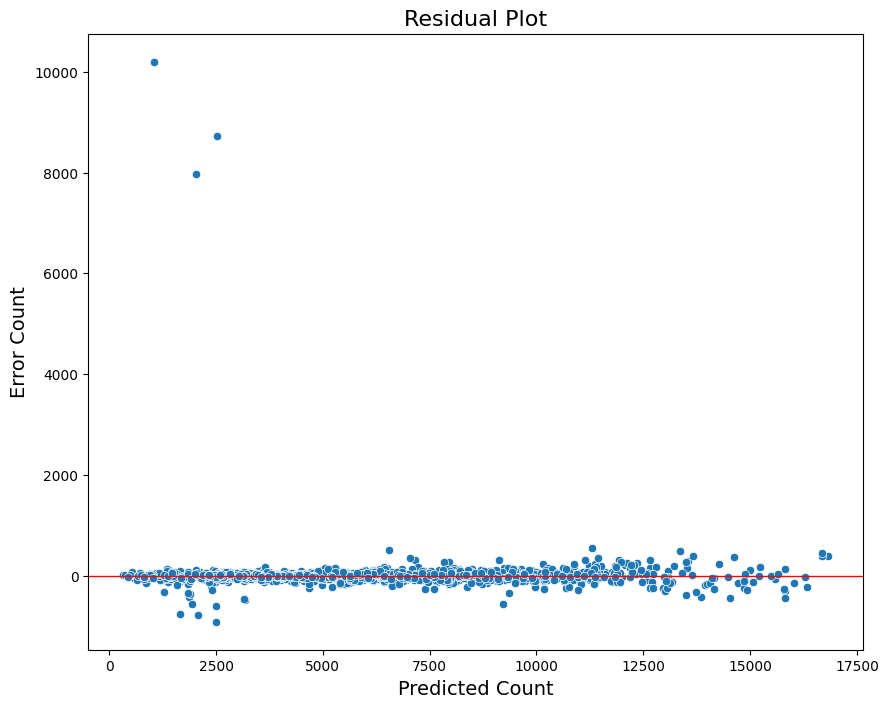

In [71]:
residuals = y_test - y_pred_xgb_tuning

# Create residual plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=y_pred_xgb_tuning, y=residuals, ax=ax)
ax.axhline(0, color='red', linestyle='-', linewidth=1)  # Add a horizontal line at y=0
ax.set_title('Residual Plot', fontsize=16)
ax.set_xlabel('Predicted Count', fontsize=14)
ax.set_ylabel('Error Count', fontsize=14)
plt.show()

**save modeling**

In [ ]:
import joblib

In [ ]:
# saving model

# best model
final_model = xgb_tuning

# fitting model
final_model.fit(X,y)

#save
joblib.dump(final_model, 'model_xgboost_joblib_adidas')

['model_xgboost_joblib_adidas']